# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 06/04/22 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula F is satisfiable or not. F is represented by a pair (X, C), where X is a set of Boolean variables and C is a set of clauses in Conjunctive Normal Form (CNF). Each clause is a disjunction of literals (a variable or its negation). This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

Recent advances in supervised learning have provided powerful techniques for classifying problems. In this project, we see the SAT problem as a classification problem. Given a Boolean formula (represented by a vector of features), we are asked to predict if it is satisfiable or not.

In this project, we represent SAT problems with a vector of 327 features with general information about the problem, e.g., number of variables, number of clauses, fraction of horn clauses in the problem, etc. There is no need to understand the features to be able to complete the assignment.

The dataset is available at:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_train.csv

This is original unpublished data.

## Data Preparation

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import neural_network


In [3]:

df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/6d5738101d173b97c565f143f945dedb9c42a400/dm_assignment2/sat_dataset_train.csv?raw=true")
df.head()

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,420,10,42.000000,0.023810,0.600000,0.000000,0.600000,0.600000,0.000000,0.600000,...,78750.0,0.000008,0.0,7.875000e-06,0.000008,2.385082e-21,0.0,2.385082e-21,2.385082e-21,1
1,230,20,11.500000,0.086957,0.137826,0.089281,0.117391,0.160870,2.180946,0.137826,...,6646875.0,17433.722184,1.0,2.981244e-12,34867.444369,1.727721e+04,1.0,1.358551e-53,3.455442e+04,0
2,240,16,15.000000,0.066667,0.300000,0.000000,0.300000,0.300000,0.000000,0.300000,...,500000.0,1525.878932,0.0,1.525879e+03,1525.878932,1.525879e+03,0.0,1.525879e+03,1.525879e+03,1
3,424,30,14.133333,0.070755,0.226415,0.485913,0.056604,0.452830,2.220088,0.226415,...,87500.0,0.000122,1.0,6.535723e-14,0.000245,8.218628e-07,1.0,1.499676e-61,1.643726e-06,0
4,162,19,8.526316,0.117284,0.139701,0.121821,0.111111,0.185185,1.940843,0.139701,...,5859400.0,16591.494310,1.0,6.912726e-42,33182.988621,1.665903e+04,1.0,0.000000e+00,3.331807e+04,1


In [4]:
df.dtypes

c                       int64
v                       int64
clauses_vars_ratio    float64
vars_clauses_ratio    float64
vcg_var_mean          float64
                       ...   
rwh_2_mean            float64
rwh_2_coeff           float64
rwh_2_min             float64
rwh_2_max             float64
target                  int64
Length: 328, dtype: object

In [5]:
df['target'].value_counts()

1    976
0    953
Name: target, dtype: int64

In [6]:
# YOUR CODE HERE
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c,1929.0,549.087092,446.746934,1.000000,222.000000,4.040000e+02,7.760000e+02,1890.000000
v,1929.0,57.689995,50.556307,2.000000,27.000000,3.900000e+01,7.000000e+01,226.000000
clauses_vars_ratio,1929.0,11.072950,8.141268,0.500000,5.333333,8.000000e+00,1.413333e+01,44.000000
vars_clauses_ratio,1929.0,0.134343,0.084303,0.022727,0.070755,1.250000e-01,1.875000e-01,2.000000
vcg_var_mean,1929.0,0.111101,0.103638,0.014386,0.039427,7.990160e-02,1.452991e-01,1.000000
...,...,...,...,...,...,...,...,...
rwh_2_mean,1929.0,16377.181091,43597.829247,0.000000,7.152557,9.765625e+02,9.525920e+03,386723.660084
rwh_2_coeff,1929.0,0.866337,0.327328,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000
rwh_2_min,1929.0,1284.981237,9951.459922,0.000000,0.000000,6.033537e-81,2.843545e-12,173611.111111
rwh_2_max,1929.0,31469.380944,84954.358986,0.000000,12.649950,1.712976e+03,1.905184e+04,773447.302106


In [7]:
# DATA PREPARATION 

df = df.dropna(axis=1)
df = df.replace([np.inf], 10000000000000000)
df = df.replace([-np.inf], -10000000000000000)
df.head()

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,target
0,420,10,42.000000,0.023810,0.600000,0.000000,0.600000,0.600000,0.000000,0.600000,...,78750.0,0.000008,0.0,7.875000e-06,0.000008,2.385082e-21,0.0,2.385082e-21,2.385082e-21,1
1,230,20,11.500000,0.086957,0.137826,0.089281,0.117391,0.160870,2.180946,0.137826,...,6646875.0,17433.722184,1.0,2.981244e-12,34867.444369,1.727721e+04,1.0,1.358551e-53,3.455442e+04,0
2,240,16,15.000000,0.066667,0.300000,0.000000,0.300000,0.300000,0.000000,0.300000,...,500000.0,1525.878932,0.0,1.525879e+03,1525.878932,1.525879e+03,0.0,1.525879e+03,1.525879e+03,1
3,424,30,14.133333,0.070755,0.226415,0.485913,0.056604,0.452830,2.220088,0.226415,...,87500.0,0.000122,1.0,6.535723e-14,0.000245,8.218628e-07,1.0,1.499676e-61,1.643726e-06,0
4,162,19,8.526316,0.117284,0.139701,0.121821,0.111111,0.185185,1.940843,0.139701,...,5859400.0,16591.494310,1.0,6.912726e-42,33182.988621,1.665903e+04,1.0,0.000000e+00,3.331807e+04,1


# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate K-NN and decision tree classifiers using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset. Compare the results of both classifiers.

# Basic K-NN Model
For a basic K-NN model I have just arbitrarily decided to use 10 nearest neighbours. 10 is not too many neighbours that it might affect the accuracy too drastically by taking very distant neighbours, but not too small that it might affect the accuracy by only taking one or a couple of neighbours. During hyperparameter testing we can figure out how many neighbours is optimal for this dataset, though it might be much more than 10 since there are so many data points in this dataset. Perhaps we will end up deciding to use weighted K-NN instead also. This will be figured out later. 

In [8]:
# YOUR CODE HERE
knn = neighbors.KNeighborsClassifier(n_neighbors = 10)
features = df.loc[:, "c":"rwh_2_max"]
labels = df["target"]

In [49]:
(train_features,
 test_features, 
 train_labels, 
 test_labels) = model_selection.train_test_split(features,
                                 labels, 
                                 test_size = 0.3)
 
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)


(1350, 311) (1350,)
(579, 311) (579,)


In [50]:
knn.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [51]:
print(knn.score(test_features, test_labels))

0.8238341968911918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


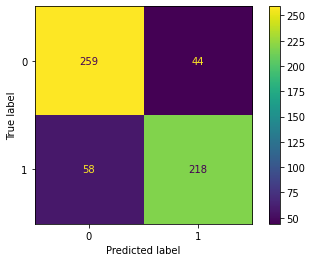

In [52]:
metrics.plot_confusion_matrix(knn, test_features, test_labels)
plt.show()

# Basic Decision Tree
This decision tree is using the default parameters even though we are used to using the criterion information gain ("entropy") instead of the gini impurity criterion that is the default. We learned about information gain in lectures so when testing I will probably try this criterion instead later.

In [53]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(train_features, train_labels)

In [54]:
dtc.score(test_features, test_labels)

0.9775474956822107

[Text(0.5576923076923077, 0.95, 'gsat_BestSolution_Mean <= 0.997\ngini = 0.499\nsamples = 1350\nvalue = [650, 700]'),
 Text(0.4807692307692308, 0.85, 'gini = 0.0\nsamples = 586\nvalue = [0, 586]'),
 Text(0.6346153846153846, 0.85, 'saps_BestSolution_CoeffVariance <= 0.638\ngini = 0.254\nsamples = 764\nvalue = [650, 114]'),
 Text(0.5576923076923077, 0.75, 'gsat_BestSolution_CoeffVariance <= 0.467\ngini = 0.109\nsamples = 690\nvalue = [650, 40]'),
 Text(0.34615384615384615, 0.65, 'band_node_std <= 6.85\ngini = 0.03\nsamples = 590\nvalue = [581, 9]'),
 Text(0.2692307692307692, 0.55, 'vcg_var_min <= 0.007\ngini = 0.014\nsamples = 585\nvalue = [581, 4]'),
 Text(0.19230769230769232, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.34615384615384615, 0.45, 'band_node_val_rate <= 0.292\ngini = 0.01\nsamples = 584\nvalue = [581, 3]'),
 Text(0.15384615384615385, 0.35, 'vcg_var_entropy <= 2.03\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsample

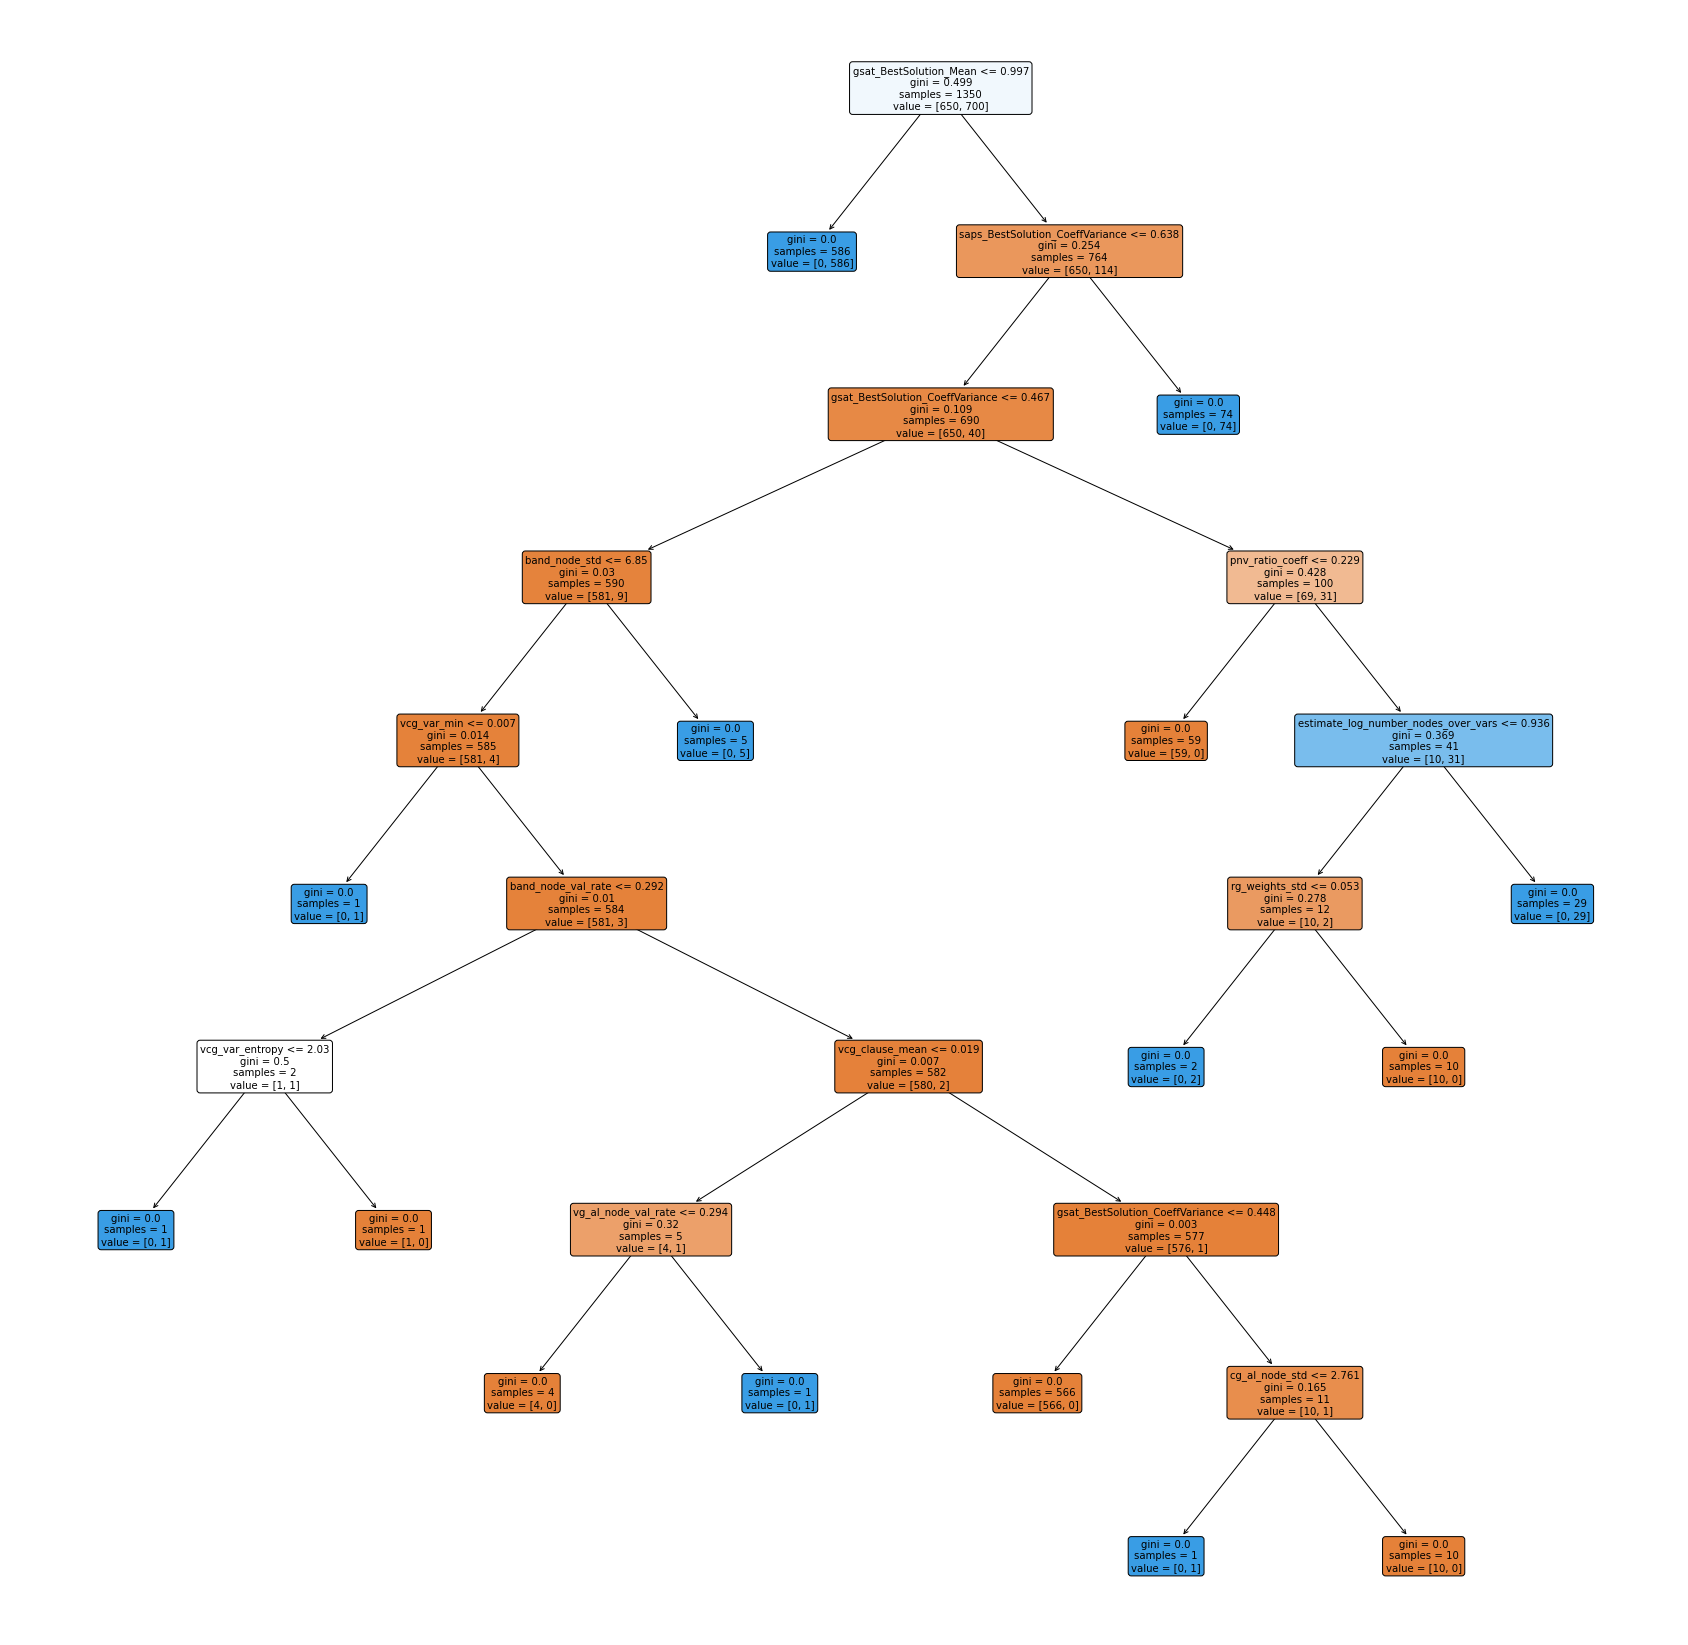

In [76]:
plt.figure(figsize=(30, 30))
tree.plot_tree(dtc, feature_names = features.columns, 
filled = True, rounded = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


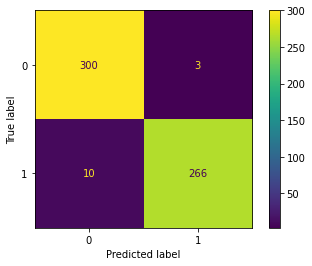

In [56]:
metrics.plot_confusion_matrix(dtc, test_features, test_labels)
plt.show()

# Basic comparison

For now the decision tree has better accuracy than the K-NN with an accuracy score of roughly 0.98 compared to an accuracy score of roughly 0.82 respectively. This can also be seen by their confusion matrices. We will use robust evaluation to see if this changes. 

## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods, for instance:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature reduction.
* Feature normalisation.

Your report should provide concrete information of your reasoning; everything should be well-explained.

Do not get stressed if the things you try do not improve the accuracy. The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.

# Robust evaluation for K-NN

We will first split the dataset differently, by using a random seed this time for configuring the holdout set. This should let the training be more robust. 

In [57]:
(train_features,
 test_features, 
 train_labels, 
 test_labels) = model_selection.train_test_split(features,
                                 labels, 
                                 test_size = 0.3,
                                 random_state = 1)

In [59]:
knn.fit(train_features, train_labels)
print(knn.score(test_features, test_labels))

0.8186528497409327


Splitting the dataset randomly seems to have decreased the accuracy by roughly 0.005, which is not ideal but considering this is just due to randomness is understandable. Regardless, this should help the algorithm to take on future data which may not be as similar to the training dataset.

In [63]:
knn_parameters = {"n_neighbors": [1, 3, 5, 7, 11]}

knn_clf = model_selection.GridSearchCV(knn, knn_parameters)

knn_clf.fit(train_features, train_labels)

print(knn_clf.best_estimator_)
print(knn_clf.best_score_)
print(knn_clf.best_estimator_.score(test_features, test_labels))

KNeighborsClassifier(n_neighbors=1)
0.8800000000000001
0.8739205526770294


# K-neighbours 1 is best?

Using GridSearchCV to search hyperparameters has given us the result that using only 1 neighbour is the most accurate. This is an odd scenario but may be happening because there are points in the dataset that are either the same as each other or extremely similar to each other. This seems improbable but it is more likely when we consider the sheer amount of data points we are processing in this dataset. 

We can see that this is achieving an accuracy of roughly 0.87 on the test dataset, which is more accurate than the previous accuracy we saw of roughly 0.82 from before. 

However, we should be careful using an n of 1 on other testing datasets, as they may not be as similar to the training dataset. 

# Normalising the Data

We will try transforming the data which should avoid excess weight being given to certain data points just because they are bigger numbers, for example the max values may be holding more sway in the data than the min values, when what we should be looking at is the difference between these values. 
The MinMaxScaler takes every value and displays it as a value on a scale between 0 and 1, with 0 being the closest to the minimum value in that category and 1 being the closest to the maximum value in that category.

In [65]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_features)

scaled_train_features = scaler.transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [68]:
knn_parameters = {"n_neighbors": [1, 3, 5, 7, 11]}

knn_clf = model_selection.GridSearchCV(knn, knn_parameters)

knn_clf.fit(scaled_train_features, train_labels)

print(knn_clf.best_estimator_)
print(knn_clf.best_score_)
print(knn_clf.best_estimator_.score(scaled_test_features, test_labels))

KNeighborsClassifier(n_neighbors=1)
0.9548148148148148
0.9637305699481865


Scaling the data has made a huge improvement for knn, from an accuracy of roughly 0.87 to an accuracy of roughly 0.96. However, we should double check the best accuracy if we remove the option for using 1 as the n (because if we come across an extremely different dataset we need to use for testing we should not be using an n of 1).

In [69]:
knn_parameters = {"n_neighbors": [3, 5, 7, 11]}

knn_clf = model_selection.GridSearchCV(knn, knn_parameters)

knn_clf.fit(scaled_train_features, train_labels)

print(knn_clf.best_estimator_)
print(knn_clf.best_score_)
print(knn_clf.best_estimator_.score(scaled_test_features, test_labels))

KNeighborsClassifier(n_neighbors=7)
0.9444444444444444
0.9533678756476683


GridSearchCV has now determined the best n is 7, which is an interesting difference from an n of 1 when 3 and 5 also exist in the parameter options. It makes sense that it may need a more well-rounded selection of neighbours when it cannot select the one exact same neighbour from the training dataset. This knn model still has an accuracy of roughly 0.95 on the test dataset, which is quite good.

# Data reduction using PCA

Principal component analysis can help us to get rid of noise in the data, helping us to have a cleaner dataset and hopefully improving the accuracy of our models. We will choose a number of components to keep. For K-NN we will perform the PCA on the scaled data.

In [96]:
pca = PCA(n_components= 50)
pca_scaled_train_features = pca.fit_transform(scaled_train_features)
pca_scaled_test_features = pca.transform(scaled_test_features)

In [97]:
knn_parameters = {"n_neighbors": [3, 5, 7, 11]}

knn_clf = model_selection.GridSearchCV(knn, knn_parameters)

knn_clf.fit(pca_scaled_train_features, train_labels)

print(knn_clf.best_estimator_)
print(knn_clf.best_score_)
print(knn_clf.best_estimator_.score(pca_scaled_test_features, test_labels))

KNeighborsClassifier(n_neighbors=7)
0.9466666666666667
0.9602763385146805


There are roughly 380 components in this dataset, so it can be hard to know what n to use for PCA. I tried a few (5, 10, 50, 100) and 50 tended to give the best results. The accuracy of n_neighbours = 7 has now increased to roughly 0.96. 

The most important part of improving the accuracy of the knn however was definitely normalising the data.

# Robust evaluation for decision tree

We will try entropy as the criterion for the decision tree as well as giving it max depth and give it a minimum number of samples needed to split an internal node.

In [32]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy", 
max_depth= 2, min_samples_split = 5)
dtc = dtc.fit(train_features, train_labels)

In [33]:
dtc.score(test_features, test_labels)

0.9671848013816926

This has reduced the accuracy by ~0.01. This may be due to max depth, which when removed lets all nodes be expanded until all leaves have been explored. We can try to remove the max depth we can have better accuracy.

In [36]:
dtc = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = 5)
dtc = dtc.fit(train_features, train_labels)
dtc.score(test_features, test_labels)

0.9879101899827288

Using entropy and a minimum samples splitting size has increased the entropy by nearly 0.01, which is good. 

We can also try using gridsearchcv to find the best parameters for the decision tree. We will not look at max depth as we have already found this is hindering the accuracy.

In [72]:
basic_dtc = tree.DecisionTreeClassifier()
dtc_parameters = {"criterion": ["entropy", "gini"],
              "min_impurity_decrease" : [0.01, 0.1, 0.2],
              "min_samples_split" : [5, 10, 20] }
dtc_clf = model_selection.GridSearchCV(basic_dtc, dtc_parameters, cv = 10)
dtc_clf.fit(train_features, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_impurity_decrease': [0.01, 0.1, 0.2],
                         'min_samples_split': [5, 10, 20]})

In [73]:
print(dtc_clf.best_estimator_)
print(dtc_clf.best_score_)
print(dtc_clf.best_estimator_.score(test_features, test_labels))

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_split=5)
0.9807407407407409
0.9879101899827288


GridSearchCV seems to agree with our previous testing that entropy is a better criterion than gini impurity in this case. Its best score is ~0.98, but when the best estimator is used on the test set it achieves the same score as our previous estimator (roughly 0.9879) which is very accurate. The minimum samples split does not seem to make a difference even though GridSearchCV is using 20 and our previous test used 5. 

When ran again, GridSearchCV used 5 as min_samples_split. It is likely that it is choosing arbitrarily between the minimum samples parameters as they are not making a difference.

We will now try using the normalised data instead. It is likely this won't make a difference for the decision tree as it uses information gain to compute differences between data points, not things such as euclidean distance like K-NN. However, it is worth trying anyways.

In [75]:
dtc_clf = model_selection.GridSearchCV(basic_dtc, dtc_parameters, cv = 10)
dtc_clf.fit(scaled_train_features, train_labels)

print(dtc_clf.best_estimator_)
print(dtc_clf.best_score_)
print(dtc_clf.best_estimator_.score(scaled_test_features, test_labels))

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_split=5)
0.9807407407407409
0.9861830742659758


As expected, no real difference can be seen when using normalised data for the decision tree. It even seems to have decreased the accuracy to 0.9861. 

In [102]:
pca = PCA(n_components= 100)
pca_train_features = pca.fit_transform(train_features)
pca_test_features = pca.transform(test_features)

In [104]:
dtc_clf = model_selection.GridSearchCV(basic_dtc, dtc_parameters, cv = 10)
dtc_clf.fit(pca_train_features, train_labels)

print(dtc_clf.best_estimator_)
print(dtc_clf.best_score_)
print(dtc_clf.best_estimator_.score(pca_test_features, test_labels))

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_split=10)
0.9162962962962963
0.9084628670120898


For the decision tree, it seems that PCA decreases the accuracy no matter what number of components is used. 

The decision tree is still performing better than the K-NN at this point, especially when it is using the original data (not the transformed data).

## New classifier (10 Marks)

Replicate the previous task for a classifier that we did not cover in class. So different than K-NN and decision trees. Briefly describe your choice.
Try to create the best model for the given dataset.
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently, load all the libraries you need as well.

# Multi-Layer Perceptron Neural Network

I chose to use the neural_network.MLPClassifier option in sklearn because we learned about neural networks in another module and it is a useful model that tends to give accurate results when faced with large amounts of complicated data like we have in this assignment. 

In [108]:
# YOUR CODE HERE
mlp = neural_network.MLPClassifier()

mlp.fit(train_features, train_labels)

MLPClassifier()

In [109]:
print(mlp.score(test_features, test_labels))

0.7098445595854922


The basic model with no data processing is giving an accuracy score of roughly 0.71, but this can be improved by testing different parameters and processing the data.

In [110]:
mlp.fit(scaled_train_features, train_labels)
print(mlp.score(scaled_test_features, test_labels))

0.9792746113989638


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPs do much better using normalised data as can be seen here, the accuracy has increased to roughly 0.98 making it the most accurate model so far. We can experiment with some hyperparameters to see if we can get it to do better.

In [113]:
mlp_parameters = {"solver" : ["lbfgs", "sgd", "adam"] }

dtc_mlp = model_selection.GridSearchCV(mlp, mlp_parameters, cv = 10)
dtc_mlp.fit(scaled_train_features, train_labels)

print(dtc_mlp.best_estimator_)
print(dtc_mlp.best_score_)
print(dtc_mlp.best_estimator_.score(scaled_test_features, test_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Op

MLPClassifier()
0.9770370370370373
0.9792746113989638


In [114]:
print(dtc_mlp.best_params_)

{'solver': 'adam'}


It is hard to spend time experimenting with the most important hyperparameters of MLP (the solvers and the activation) as it takes a decent amount of time. We can see that the best solver for this dataset is adam and there has been no change in accuracy from the default because adam is the default.

# <font color="blue">FOR GRADING ONLY</font>

Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset: 
https://github.com/andvise/DataAnalyticsDatasets/blob/main/dm_assignment2/sat_dataset_test.csv

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import neural_network
from joblib import dump, load
from io import BytesIO
import requests

# INSERT YOUR MODEL'S URL
mLink = "https://github.com/C-Parry/CS6405-Labs/blob/69574b925682b2af230a3b95b46204200ab69351/MLP_model?raw=true"
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)
# YOUR CODE HERE

final_df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/a83fb2b3519220085892da6c38477ce04ba8768e/dm_assignment2/sat_dataset_test.csv?raw=true")
df.head()

KeyError: ignored

I couldn't get the github to work.